# Imputacion de un unico valor

## Preparacion del Entorno

### Librerias

In [1]:
import janitor  # limpiar datos
import matplotlib.pyplot as plt # visualizacion de datos
import missingno    # exploracion de valores faltantes
import nhanes.load  # libreria con los datos a analizar
import numpy as np  # calculos numericos
import pandas as pd # trabajar con dataframe
import scipy.stats  # trabjar con estadisticos
import seaborn as sns   #   visualizacion estadistica

### Configuracion Graficas

In [2]:
%matplotlib inline

# tamaño de los graficos
sns.set(
    rc={
        'figure.figsize':(8, 6)
    }
)

# estilo de los graficos
sns.set_style('whitegrid')

### Cargar funciones personalizadas

In [8]:
%run '../utils2.ipynb'

## Cargar los datos

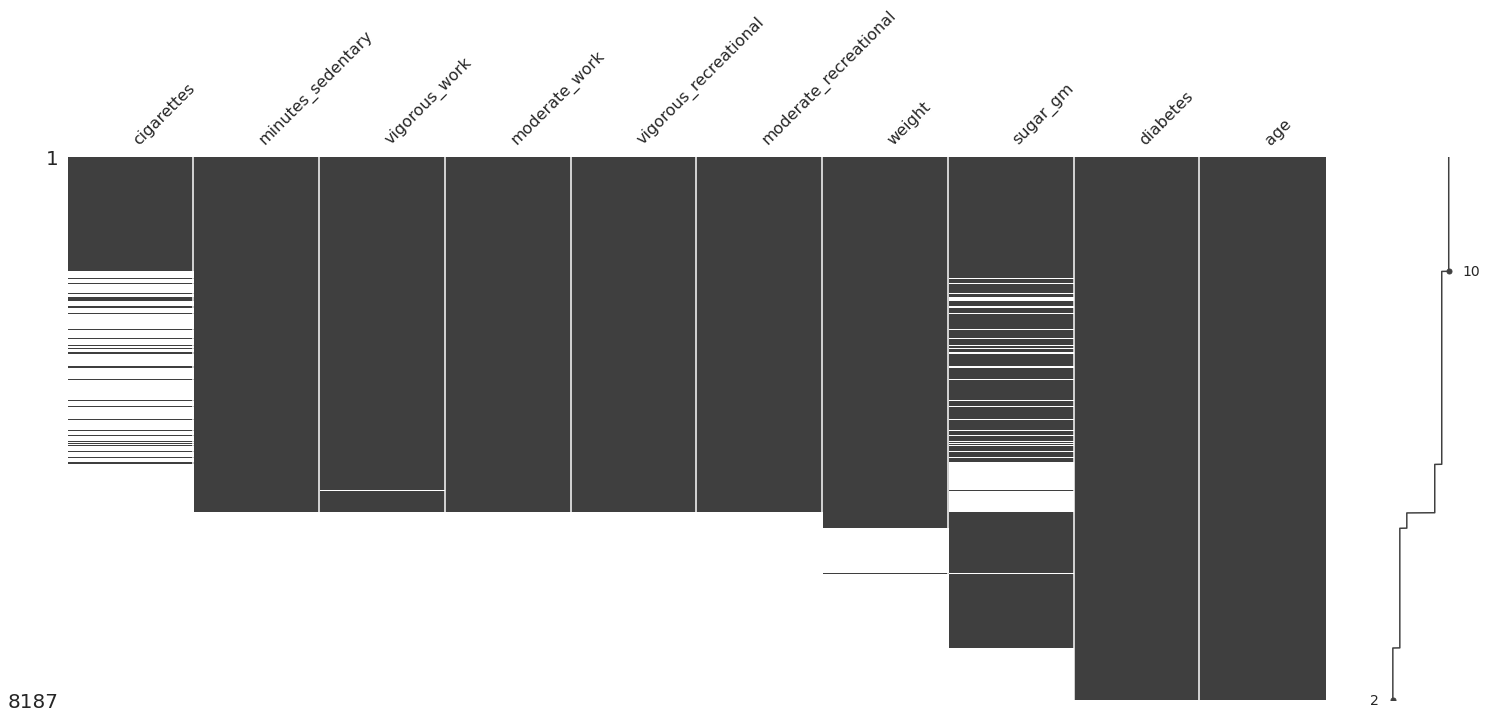

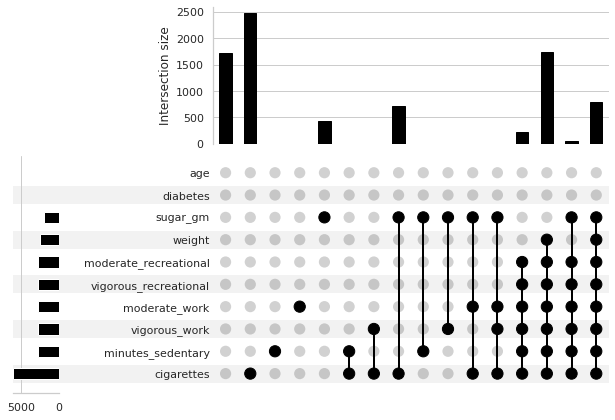

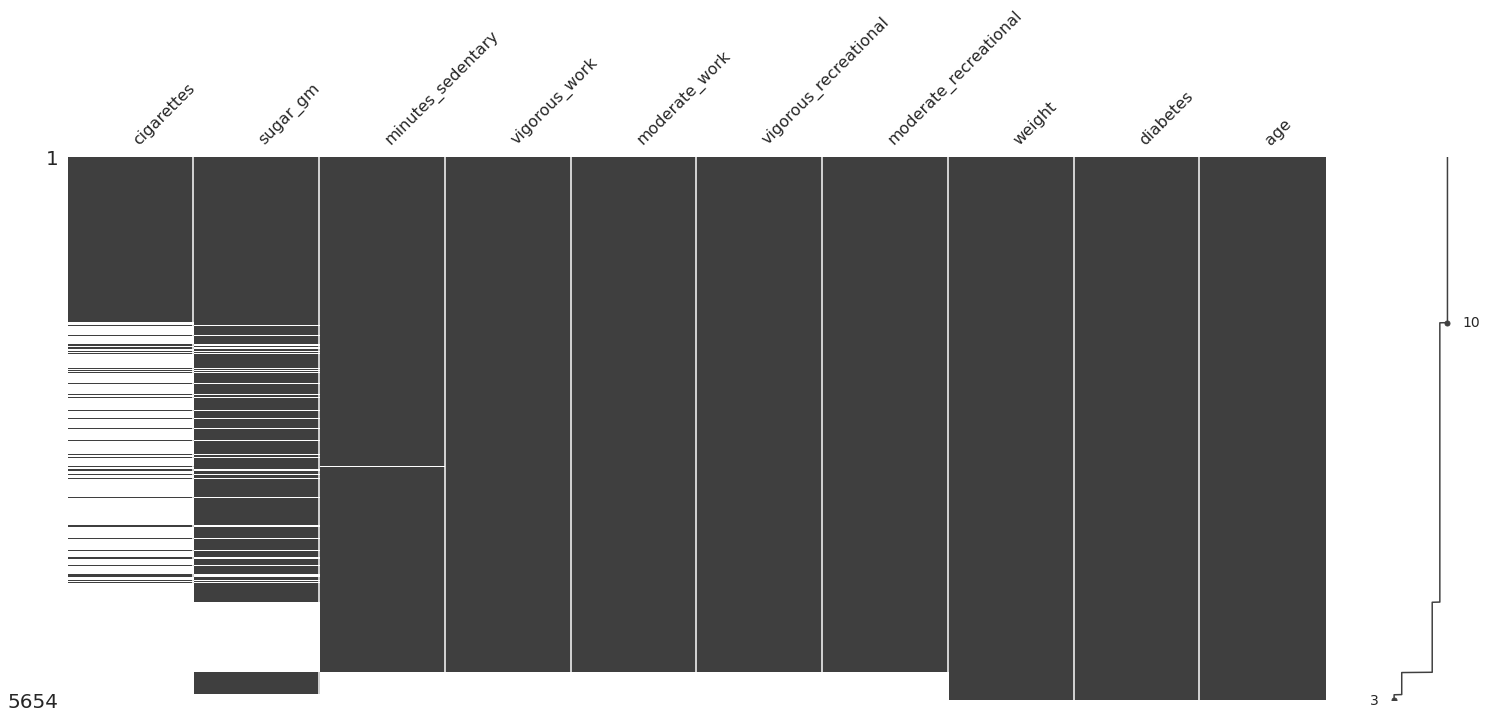

12.25 %


In [3]:
%run descarga_carga_datos.ipynb

## Imputacion de un unico valor

In [4]:
nhanes_df

,cigarettes,sugar_gm,minutes_sedentary,vigorous_work,moderate_work,vigorous_recreational,moderate_recreational,weight,diabetes,age
SEQN,,,,,,,,,,
93705.0,Not at all,43.04,300.0,0.0,0.0,0.0,1.0,165.0,0,66.0
93706.0,NaN,NaN,240.0,0.0,0.0,0.0,1.0,145.0,0,18.0
93709.0,Every day,NaN,600.0,0.0,1.0,0.0,0.0,200.0,0,75.0
93711.0,NaN,163.76,420.0,0.0,0.0,1.0,1.0,142.0,0,56.0
93712.0,Some days,207.67,120.0,1.0,1.0,1.0,1.0,135.0,0,18.0
...,...,...,...,...,...,...,...,...,...,...
102948.0,Not at all,NaN,120.0,0.0,0.0,1.0,0.0,118.0,0,31.0
102949.0,Every day,NaN,60.0,1.0,1.0,0.0,0.0,180.0,0,33.0
102953.0,Not at all,NaN,360.0,1.0,1.0,0.0,0.0,218.0,0,42.0


### Imputacion para la variable sugar_gm

In [5]:
# imputacion para la variable sugar_gm

(
    nhanes_df
    # metodo janitor
    .transform_column(
        'sugar_gm',
        lambda x: x.fillna(x.mean()),
        elementwise=False
    )
)

,cigarettes,sugar_gm,minutes_sedentary,vigorous_work,moderate_work,vigorous_recreational,moderate_recreational,weight,diabetes,age
SEQN,,,,,,,,,,
93705.0,Not at all,43.040000,300.0,0.0,0.0,0.0,1.0,165.0,0,66.0
93706.0,NaN,95.011977,240.0,0.0,0.0,0.0,1.0,145.0,0,18.0
93709.0,Every day,95.011977,600.0,0.0,1.0,0.0,0.0,200.0,0,75.0
93711.0,NaN,163.760000,420.0,0.0,0.0,1.0,1.0,142.0,0,56.0
93712.0,Some days,207.670000,120.0,1.0,1.0,1.0,1.0,135.0,0,18.0
...,...,...,...,...,...,...,...,...,...,...
102948.0,Not at all,95.011977,120.0,0.0,0.0,1.0,0.0,118.0,0,31.0
102949.0,Every day,95.011977,60.0,1.0,1.0,0.0,0.0,180.0,0,33.0
102953.0,Not at all,95.011977,360.0,1.0,1.0,0.0,0.0,218.0,0,42.0


In [6]:
# valor de la media de sustitucion

(
    nhanes_df
    # metodo janitor
    .transform_column(
        'sugar_gm',
        lambda x: x.fillna(x.mean()),
        elementwise=False
    )
    .sugar_gm
    .mean()
)

95.01197703219773

In [7]:
# valor de la media de sugar_gm con valores faltantes

nhanes_df.sugar_gm.mean()

95.01197703219981

ambos valores son los mismos. Se preserva los estadisticos de los datos

#### Visualizacion de valores imputados para sugar_gm y minutes_sedentary

In [11]:
# matriz de sombra para las variables sugar_gm y minutes_sedentary

(
    nhanes_df
    .select_columns('sugar_gm', 'minutes_sedentary')
    .missing.bind_shadow_matrix2(True, False, suffix='_imp')
    .assign(
        sugar_gm = lambda df: df.sugar_gm.fillna(value = df.sugar_gm.mean()),\
        minutes_sedentary = lambda df: df.minutes_sedentary.fillna(value = df.sugar_gm.mean())
    )
)

,sugar_gm,minutes_sedentary,sugar_gm_imp,minutes_sedentary_imp
SEQN,,,,
93705.0,43.040000,300.0,False,False
93706.0,95.011977,240.0,True,False
93709.0,95.011977,600.0,True,False
93711.0,163.760000,420.0,False,False
93712.0,207.670000,120.0,False,False
...,...,...,...,...
102948.0,95.011977,120.0,True,False
102949.0,95.011977,60.0,True,False
102953.0,95.011977,360.0,True,False


<Figure size 576x576 with 0 Axes>

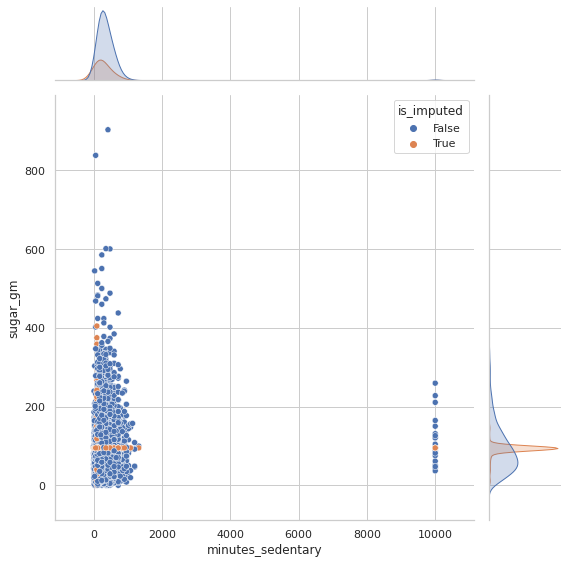

In [14]:
# visualizacion mediante un scatterplot

plt.figure(figsize=(8, 8))

(
    nhanes_df
    .select_columns('sugar_gm', 'minutes_sedentary')
    .missing.bind_shadow_matrix2(True, False, suffix='_imp')
    .assign(
        sugar_gm = lambda df: df.sugar_gm.fillna(value = df.sugar_gm.mean()),
        minutes_sedentary = lambda df: df.minutes_sedentary.fillna(value = df.sugar_gm.mean())
    )
    .missing.scatter_imputation_plot(
        y='sugar_gm',
        x='minutes_sedentary',
        show_marginal = True,   # muestra la distribucion a los costado
        height = 8
    )
)

La grafica nos muestra como la distribucion de los valores imputados es diferente a la de los datos reales. Los valores imputados se acumulan en una zona lo cual rompe con la estructura de la distribucion real. La imputacion no es buena.